In [56]:
from sklearn import datasets
from sklearn.decomposition import PCA
from src.model.moe import *
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from src.visualization.plots import custom_decision_region_plot, learners_decision_regions_plot
import pandas as pd

In [34]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_reduced = PCA(n_components=2).fit_transform(iris.data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.33, random_state=42)

In [78]:
# method = SVC
# params = {'C': [1, 10, 100, 1000], 'kernel':['rbf'], 'gamma': [0.01, 0.1, 1, 10]}

method = DecisionTreeClassifier
params = {'criterion' : {"gini", "entropy"}, 'max_depth' : list(range(1, 10, 1))}

# method = KNeighborsClassifier
# params = {'n_neighbors' : list(range(1, 13, 2))}

clf = MOE(method, params, sample_size=None,
    wrab=True,
    max_features='auto',
    lam=1,
    eval_metric=accuracy_score,
    prop_sample=0.1,
    n_learners=10,
    random_state=1234)

In [79]:
clf.fit(X_train, y_train)

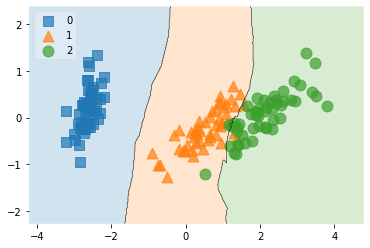

In [80]:
fig1 = plt.gcf()
custom_decision_region_plot(X_train, y_train, clf, title='')

### Limited learners detail

In [81]:
df_learners = pd.DataFrame([{**i['scores'], **{'model':str(i['learner'])}} for i in clf.learners])

print(f'Test error: {df_learners.oob_error.mean().round(2)} ({df_learners.oob_error.std().round(2)})')
print(f'Train error: {df_learners.train_error.mean().round(2)} ({df_learners.train_error.std().round(2)})')
print(f'L_mo: {df_learners.best_score.mean().round(2)} ({df_learners.best_score.std().round(2)})')

Test error: 0.09(0.08)
Train error: 0.0(0.0)
L_mo: 0.01(0.02)


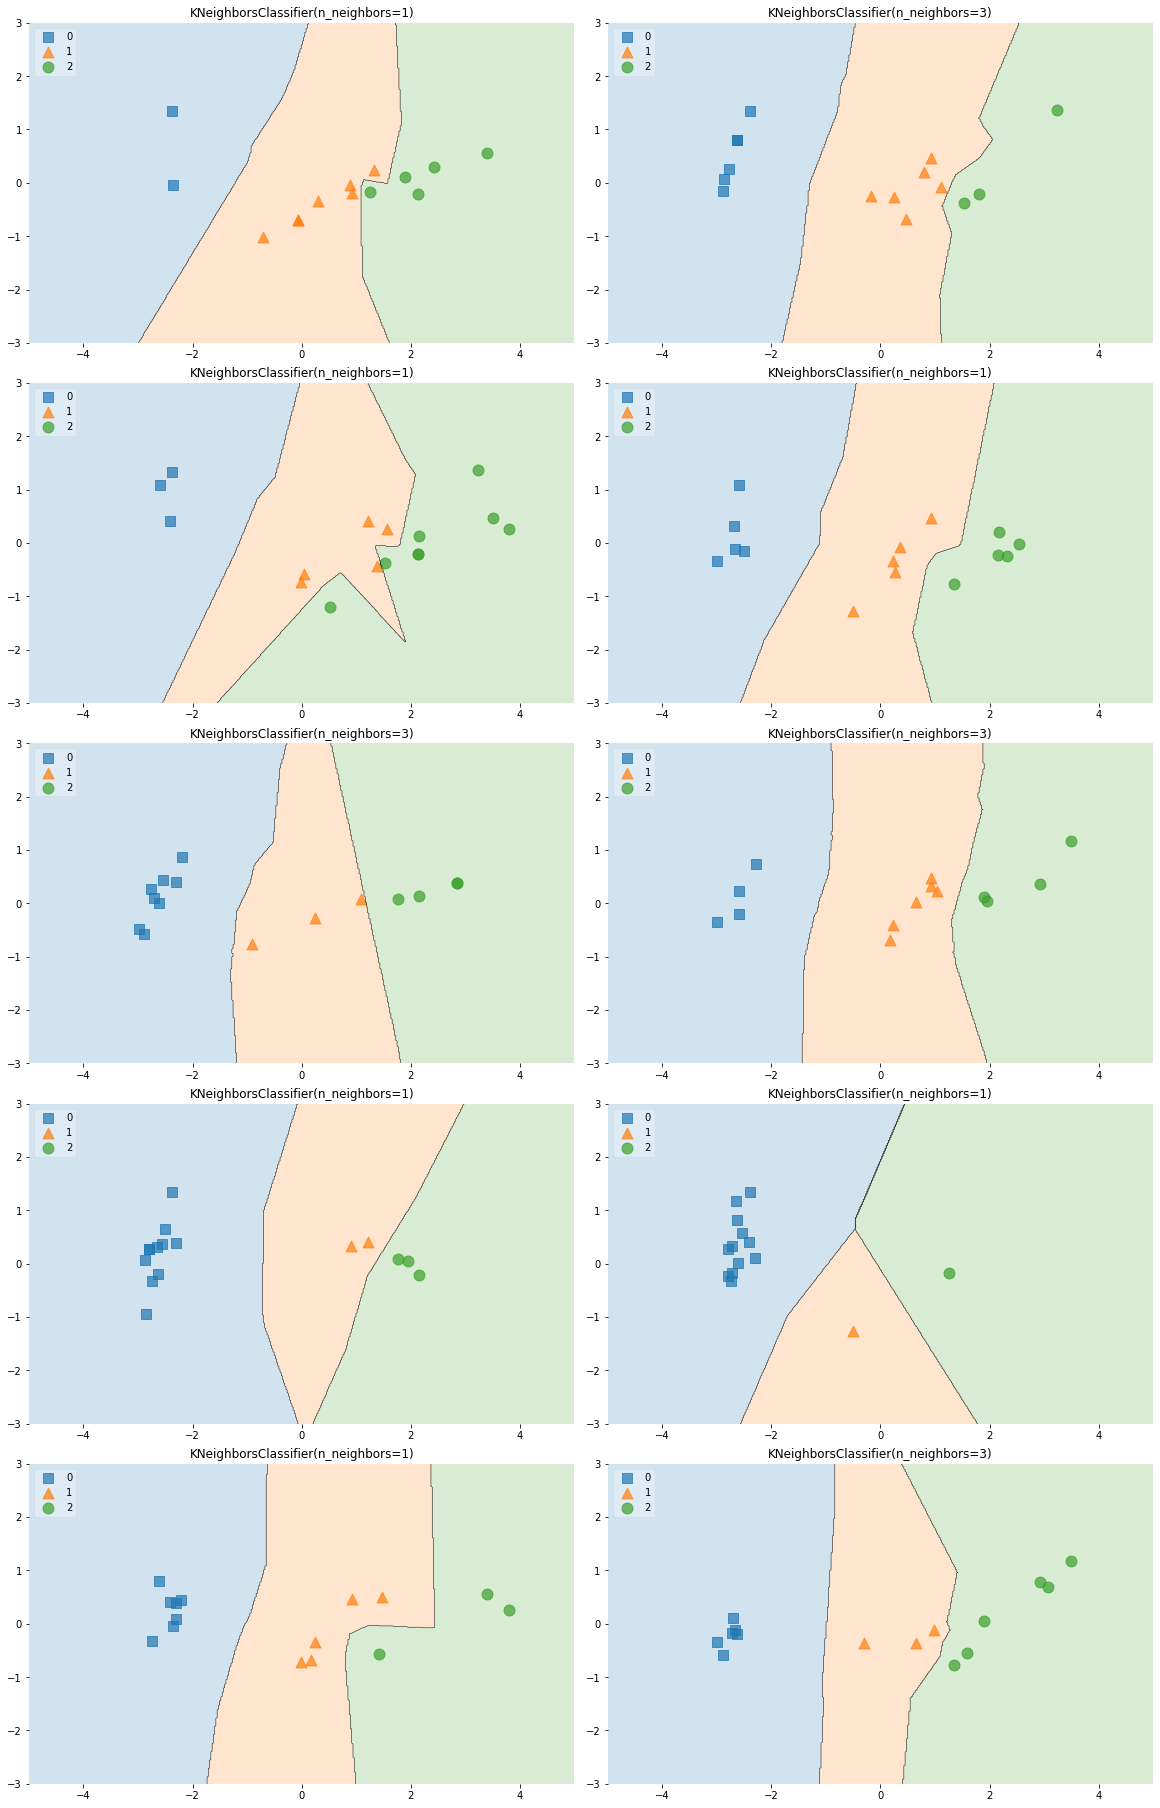

In [82]:
learners = [learner for learner in clf.learners if learner['learner'] is not None]
learners_decision_regions_plot(X_reduced, y, learners, zoom=0.1)